# Using Logistic Regression to Predict Survival on the Titanic

The aim of this notebook is to successfully run through a real-life example of classification using Logistic Regression.

## Contents
### 0. Loading the Data
### 1. Exploratory Analysis
#### 1.1. 
### 2. Data Cleansing
#### 2.1. 
### 3. Feature Engineering
#### 3.1. 
### 4. Algorithm Selection
#### 4.1. Due to the nature of the aim of this exercise, the algorithm used for prediction will be Logistic Regression, therefore the usual algorithm selection process will not be necessary. 
### 5. Training the Model
#### 5.1. First attempt

## 0. Loading the Data
The first step in this exercise is to load in the data.
### 0.1. Setting up the File
In order to load the data, the directory needs to be set correctly.

In [21]:
#import the required modules
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
#Set directory.
path = r'C:\Users\user1\Desktop\DataScience\Portfolio\Titanic'
#r sets to raw string- stops the backslashes causing errors
os.chdir(path)
dirpath = os.getcwd()
print('Current Directory: ' + dirpath)
foldername = os.path.basename(dirpath)
print('Current Folder: ' + foldername)

Current Directory: C:\Users\user1\Desktop\DataScience\Portfolio\Titanic
Current Folder: Titanic


### 0.2. Importing the Data
To import the data we will use the read_csv function from pandas.


In [44]:
#import data
data = pd.read_csv('train.csv');

## 1. Exploratory Analysis
During the exploratory analysis we will:
- answer some basic questions about the data
- observe some examples of the data
- plot the distributions of the numeric features (using histograms) and the categorical features (using bar charts)
- look for relationships between categorical and numeric features- segmentation
- look for correlations between the numeric features
- summarise and conclue our findings to move forward
### 1.1. Basic Information
We will display the first few rows of data and answer some basic questions about its structure.

In [23]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [24]:
data.count()

PassengerId    891
Survived       891
Pclass         891
Name           891
Sex            891
Age            714
SibSp          891
Parch          891
Ticket         891
Fare           891
Cabin          204
Embarked       889
dtype: int64

From the above, we can see that there we are dealing with a mix of categorical and numeric features and that we have 889 training observations. There are 177 missing values for Age, 2 missing values for Embarked and 685 missing values for Cabin. We will deal with these when we cleanse the data later on.

In [25]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### 1.2. Feature Distributions
We will now generate charts to better understand the distribution of the features.
#### 1.2.1. Numeric Distributions
We will first generate a grid of histograms to display the distributions of our numeric features.

   Survived  Pclass   Age  SibSp  Parch     Fare
0         0       3  22.0      1      0   7.2500
1         1       1  38.0      1      0  71.2833
2         1       3  26.0      0      0   7.9250
3         1       1  35.0      1      0  53.1000
4         0       3  35.0      0      0   8.0500


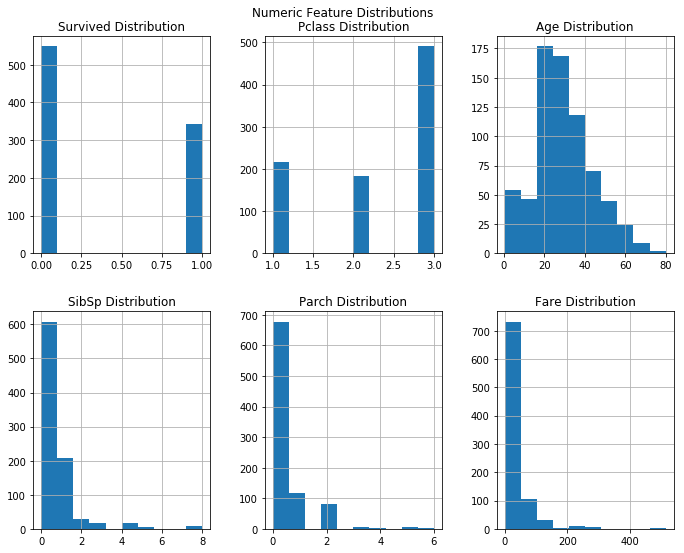

In [87]:
num_data = data[['Survived', 'Pclass','Age', 'SibSp', 'Parch', 'Fare']]
print (num_data.head())
def draw_histograms(df, variables, n_rows, n_cols):
    fig=plt.figure(figsize = (10,8))
    for i, var_name in enumerate(variables):
        ax=fig.add_subplot(n_rows,n_cols,i+1)
        df[var_name].hist(bins=10,ax=ax)
        ax.set_title(var_name+" Distribution")
    fig.tight_layout(pad = 2.5)  # Improves appearance a bit.
    fig.suptitle('Numeric Feature Distributions')
    plt.show()
draw_histograms(num_data, num_data.columns, 2, 3)

Given that we can expect 'Cabin' to be full of sparse classes, we would be better served by taking what we can assume is the Deck by extracting the first letter.

In [104]:
cat_data = data[['Sex','Cabin','Embarked']]

v=cat_data['Cabin'].str[1]
cat_data['Deck']=v
print (cat_data.head())

      Sex Cabin Embarked Deck
0    male   NaN        S  NaN
1  female   C85        C    8
2  female   NaN        S  NaN
3  female  C123        S    1
4    male   NaN        S  NaN


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


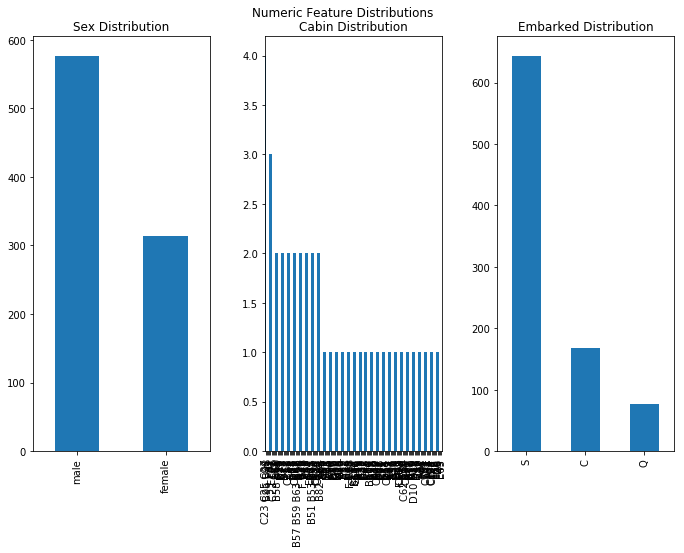

In [86]:
def draw_bar(df, variables, n_rows, n_cols):
    fig=plt.figure(figsize = (10,8))
    for i, var_name in enumerate(variables):
        ax=fig.add_subplot(n_rows,n_cols,i+1)
        df[var_name].value_counts().plot(kind='bar')
        ax.set_title(var_name+" Distribution")
    fig.tight_layout(pad = 2.5)  # Improves appearance a bit.
    fig.suptitle('Numeric Feature Distributions')
    plt.show()

draw_bar(cat_data, cat_data.columns,1,3)

In [304]:
data.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


Here we can see that there is a -0.4 correlation between Age and Passenger class- we will utilise this when estimating the missing values for Age. We can also see that Passenger Class and Fare have a significant impact on whether a passenger survived.

In [305]:
print(data.Pclass.unique())

[3 1 2]


There are 3 unique passenger classes. We will now visualise the way age varies between them.

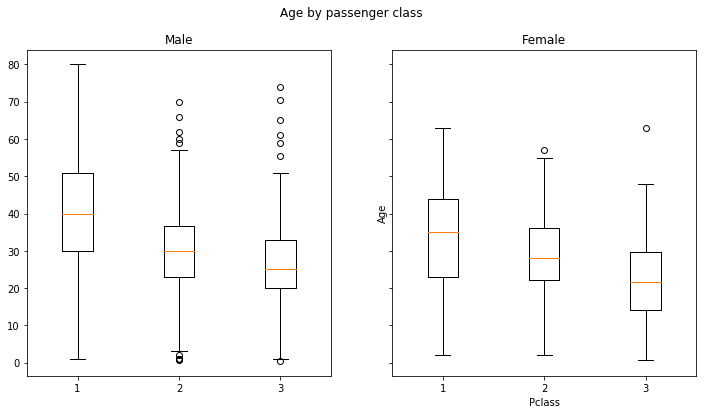

In [306]:
dataAge = data[data.Age.isnull()==False] #filter the data on non-null ages.

AgeClass_1m = dataAge.Age[(dataAge.Pclass==1) & (dataAge.Sex=='male')]
AgeClass_2m = dataAge.Age[(dataAge.Pclass==2) & (dataAge.Sex=='male')]
AgeClass_3m = dataAge.Age[(dataAge.Pclass==3) & (dataAge.Sex=='male')]

AgeClass_1f = dataAge.Age[(dataAge.Pclass==1) & (dataAge.Sex=='female')]
AgeClass_2f = dataAge.Age[(dataAge.Pclass==2) & (dataAge.Sex=='female')]
AgeClass_3f = dataAge.Age[(dataAge.Pclass==3) & (dataAge.Sex=='female')]

boxplot_m_data = [AgeClass_1m, AgeClass_2m, AgeClass_3m]
boxplot_f_data = [AgeClass_1f, AgeClass_2f, AgeClass_3f]

fig, axes = plt.subplots(nrows=1,ncols=2,figsize=(12,6),sharey=True)
axes[0].boxplot(boxplot_m_data)
axes[0].set_title('Male')

axes[1].boxplot(boxplot_f_data)
axes[1].set_title('Female')
plt.xlabel('Pclass');plt.ylabel('Age')
fig.suptitle('Age by passenger class')
plt.show()

## 2. Data Cleansing
### 2.1. Filling Missing Values
#### 2.1.1. Age
We will fill the missing ages with the mean split by passenger class and gender. I couldn't get this bit to work, so for the sake of not getting bogged down I have replaced with the mean age and moved on for now.

In [307]:
#data.Age[(data.Age.isnull()==True)&(data.Pclass==1) & (data.Sex=='male')] = AgeClass_1m.mean()
#data.Age[(data.Age.isnull()==True)&(data.Pclass==2) & (data.Sex=='male')] = AgeClass_2m.mean()
#data.Age[(data.Age.isnull()==True)&(data.Pclass==3) & (data.Sex=='male')] = AgeClass_3m.mean()
#data.Age[(data.Age.isnull()==True)&(data.Pclass==1) & (data.Sex=='female')] = AgeClass_1f.mean()
#data.Age[(data.Age.isnull()==True)&(data.Pclass==2) & (data.Sex=='female')] = AgeClass_2f.mean()
#data.Age[(data.Age.isnull()==True)&(data.Pclass==3) & (data.Sex=='female')] = AgeClass_3f.mean()
meanAge = data.Age[data.Age.isnull()==False].mean()
print(meanAge)
print('Non-null age values: ',data.Age.count())
data.Age = data.Age.fillna(meanAge)
print('Non-null age values after mean inserted: ',data.Age.count())

29.69911764705882
Non-null age values:  714
Non-null age values after mean inserted:  891


#### 2.1.2. Embarked
Now we have filled in the null values of Age, we will replace the two missing values of Embarked with the mode for the feature. Note: we will simply replace with the mode as there are only two missing values and implementing a more complex replacement would be time poorly spent.

Non-null Embarked values:  889


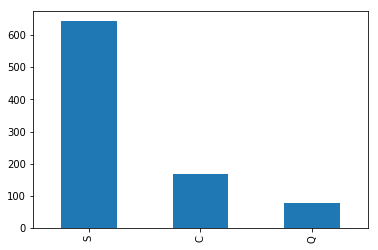

Non-null Embarked values after mode inserted:  891


In [308]:
print('Non-null Embarked values: ',data.Embarked.count())
data['Embarked'].value_counts().plot(kind='bar')
plt.show()
data.Embarked = data.Embarked.fillna('S')
print('Non-null Embarked values after mode inserted: ',data.Embarked.count())

### 2.2. Splitting the Data
Now that the null values have been handled, we can move on to splitting the data into train/test sets.

In [312]:
#set design matrix, X, and target variable vector, y.
y = data.Survived
X = data.drop('Survived', axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=101,stratify=y)
print(X_train.head())

     PassengerId  Pclass                               Name     Sex  \
702          703       3              Barbara, Miss. Saiide  female   
776          777       3                   Tobin, Mr. Roger    male   
381          382       3        Nakid, Miss. Maria ("Mary")  female   
275          276       1  Andrews, Miss. Kornelia Theodosia  female   
16            17       3               Rice, Master. Eugene    male   

           Age  SibSp  Parch  Ticket     Fare Cabin Embarked  
702  18.000000      0      1    2691  14.4542   NaN        C  
776  29.699118      0      0  383121   7.7500   F38        Q  
381   1.000000      0      2    2653  15.7417   NaN        C  
275  63.000000      1      0   13502  77.9583    D7        S  
16    2.000000      4      1  382652  29.1250   NaN        Q  


## 3. Feature Engineering
We will now prepare the features.